<a href="https://colab.research.google.com/github/mdapoy/Machine-Learning-week-8-16/blob/main/Ch17_REPRESENTATION_LEARNING_AND_GENERATIVE_LEARNING_USING_AUTOENCODERS_AND_GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAPORAN ANALISIS BUKU
**Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow (Aurélien Géron)**

**BAB 17: REPRESENTATION LEARNING AND GENERATIVE LEARNING USING AUTOENCODERS AND GANS**

## 1. Pendahuluan
[cite_start]Bab 17 dari buku ini memperkenalkan dua konsep penting dalam Machine Learning tak terawasi (unsupervised learning): *Autoencoders* dan *Generative Adversarial Networks* (GANs). [cite_start]Kedua model ini berfokus pada pembelajaran representasi data yang efisien (*representation learning*) dan kemampuan untuk menghasilkan data baru yang mirip dengan data pelatihan (*generative learning*). [cite_start]Meskipun memiliki tujuan yang serupa, pendekatan fundamental keduanya sangat berbeda.

* [cite_start]**Autoencoder**: Belajar untuk menyalin inputnya sendiri ke outputnya dengan memaksa jaringan untuk mempelajari representasi data yang efisien melalui berbagai batasan, seperti membatasi ukuran representasi laten atau menambahkan *noise* ke input.
* [cite_start]**GANs**: Terdiri dari dua jaringan saraf yang bersaing satu sama lain—sebuah generator yang mencoba menghasilkan data realistis dan sebuah diskriminator yang mencoba membedakan data asli dari yang palsu. [cite_start]Pendekatan pelatihan adversarial ini dianggap sebagai salah satu ide paling penting dalam Machine Learning baru-baru ini.

## 2. Representasi Data yang Efisien (Efficient Data Representations)
[cite_start]Bab ini membuka dengan analogi tentang bagaimana manusia cenderung mencari pola untuk menghafal urutan angka secara efisien, yang menjadi dasar pemahaman *Autoencoder*.

### 2.1. Autoencoder
* [cite_start]**Definisi**: Autoencoder adalah jaringan saraf tiruan yang mampu mempelajari representasi padat dari data input, yang disebut *latent representations* atau *codings*, tanpa pengawasan.
* [cite_start]**Struktur**: Sebuah Autoencoder selalu terdiri dari dua bagian: sebuah *encoder* (atau *recognition network*) yang mengubah input menjadi representasi laten, diikuti oleh sebuah *decoder* (atau *generative network*) yang mengubah representasi internal menjadi output yang diharapkan mirip dengan input asli. [cite_start]Jumlah neuron di lapisan output harus sama dengan jumlah input. [cite_start]Output sering disebut rekonstruksi karena Autoencoder mencoba merekonstruksi input.
* [cite_start]**Reconstruction Loss**: Fungsi biaya mengandung *reconstruction loss* yang menghukum model ketika rekonstruksi (output) berbeda dari input.
* [cite_start]**Undercomplete Autoencoder**: Autoencoder yang memiliki dimensi lapisan *coding* lebih rendah daripada data input. [cite_start]Ini memaksa Autoencoder untuk mempelajari fitur-fitur penting dalam data dan mengabaikan yang tidak penting, karena tidak dapat secara trivial menyalin input langsung ke output.
* [cite_start]**Pembelajaran Mandiri (*Self-supervised Learning*)**: Autoencoder dapat dianggap sebagai bentuk pembelajaran mandiri, di mana label dihasilkan secara otomatis (sama dengan input).

## 3. PCA dengan Undercomplete Linear Autoencoder
[cite_start]Jika Autoencoder hanya menggunakan aktivasi linear dan fungsi biaya *Mean Squared Error* (MSE), maka ia akan melakukan *Principal Component Analysis* (PCA).

* **Implementasi**: Contoh kode menunjukkan pembangunan Autoencoder Sequential sederhana dengan satu lapisan `Dense` di encoder (dari 3 input ke 2 output) dan satu lapisan `Dense` di decoder (dari 2 input ke 3 output). [cite_start]Model ini dikompilasi dengan MSE sebagai loss dan SGD sebagai optimizer.
* [cite_start]**Pelatihan**: Data pelatihan digunakan sebagai input dan juga sebagai target, mencerminkan sifat pembelajaran mandiri (*self-supervised learning*) dari Autoencoder.
* [cite_start]**Hasil**: Autoencoder menemukan bidang 2D terbaik untuk memproyeksikan data 3D, mempertahankan varians sebanyak mungkin, mirip dengan hasil PCA.

## 4. Stacked Autoencoders (Deep Autoencoders)
[cite_start]Autoencoder dapat memiliki beberapa lapisan tersembunyi, yang disebut *stacked autoencoders* atau *deep autoencoders*. [cite_start]Menambahkan lapisan membantu Autoencoder mempelajari *codings* yang lebih kompleks.

* [cite_start]**Risiko**: Jika Autoencoder terlalu "kuat" atau kompleks tanpa batasan yang memadai, ia mungkin hanya belajar untuk menyalin input secara trivial tanpa mempelajari representasi data yang bermakna.
* [cite_start]**Arsitektur Umum**: Biasanya simetris terhadap lapisan *coding* pusat. [cite_start]Contoh untuk Fashion MNIST disebutkan memiliki 784 input, kemudian lapisan tersembunyi 100 neuron, lapisan *coding* 30 neuron, lalu lapisan tersembunyi 100 neuron, dan output 784 neuron.
* [cite_start]**Implementasi Keras**: Model dibagi menjadi `stacked_encoder` dan `stacked_decoder`. [cite_start]Encoder meratakan gambar 28x28 menjadi vektor 784, kemudian melalui dua lapisan `Dense` (100 dan 30 unit) dengan fungsi aktivasi SELU. [cite_start]Decoder mengambil *codings* 30 unit, melalui dua lapisan `Dense` (100 dan 28*28 unit) dan mengubah bentuk output menjadi 28x28. [cite_start]`binary_crossentropy` digunakan sebagai fungsi biaya, memperlakukan rekonstruksi sebagai masalah klasifikasi biner multilabel per piksel, yang cenderung mempercepat konvergensi. [cite_start]Data pelatihan (`X_train`) digunakan sebagai input dan target.

## 5. Visualisasi Rekonstruksi

Visualisasi rekonstruksi adalah cara penting untuk memeriksa apakah Autoencoder dilatih dengan benar. [cite_start]Perbedaan yang terlalu signifikan antara input asli dan output yang direkonstruksi menunjukkan Autoencoder mungkin belum terlatih dengan baik.

### 5.1. Visualisasi Dataset Fashion MNIST
[cite_start]Autoencoder dapat digunakan untuk mereduksi dimensi dataset. [cite_start]Sebagai contoh, encoder dari *stacked autoencoder* dapat mengurangi dimensi data menjadi 30, kemudian algoritma t-SNE digunakan untuk memproyeksikan data ke 2D untuk visualisasi.

## 6. Unsupervised Pretraining dengan Stacked Autoencoders
[cite_start]Autoencoder sangat berguna untuk *unsupervised pretraining*, terutama ketika data berlabel terbatas.

* [cite_start]**Skenario**: Jika Anda memiliki tugas *supervised* yang kompleks tetapi data berlabelnya sedikit, sementara data tak berlabelnya banyak, Anda dapat melatih *stacked autoencoder* pada seluruh data (berlabel dan tak berlabel).
* [cite_start]**Proses**: Setelah Autoencoder dilatih, bagian *encoder*-nya dapat digunakan kembali sebagai lapisan awal untuk jaringan saraf yang akan dilatih untuk tugas *supervised* menggunakan data berlabel. [cite_start]Lapisan-lapisan yang digunakan kembali ini seringkali dibekukan (*frozen*) pada awalnya, terutama jika data berlabel sedikit.
* [cite_start]**Sejarah**: Teknik ini, terutama dengan *Restricted Boltzmann Machines* (RBMs) atau Autoencoder, penting dalam kebangkitan Deep Learning pada tahun 2006.

## 7. Teknik Pelatihan Stacked Autoencoders
Bab ini juga membahas beberapa teknik tambahan untuk melatih *stacked autoencoders*:

### 7.1. Tying Weights (Mengikat Bobot)
* [cite_start]**Konsep**: Jika Autoencoder simetris, bobot lapisan *decoder* dapat diikat (dijadikan sama dengan transpos) bobot lapisan *encoder* yang sesuai. [cite_start]Jika $W_L$ adalah bobot lapisan ke-$L$, maka bobot lapisan *decoder* ke-$(N-L+1)$ adalah $W_L^T$.
* [cite_start]**Manfaat**: Mengurangi separuh jumlah bobot dalam model, mempercepat pelatihan, dan membatasi risiko *overfitting*.
* [cite_start]**Implementasi Keras**: Memerlukan *custom layer* seperti `DenseTranspose` yang menggunakan bobot dari lapisan `Dense` lain yang sudah ada, lalu di-transpos.

### 7.2. Training One Autoencoder at a Time (Greedy Layer-wise Training)
* [cite_start]**Konsep**: Melatih satu Autoencoder dangkal pada satu waktu, lalu menyusunnya menjadi satu *stacked autoencoder*.
* **Proses**: Melatih Autoencoder pertama untuk merekonstruksi input. Kemudian, output *encoder* pertama digunakan sebagai input untuk melatih Autoencoder kedua, dan seterusnya. [cite_start]Setelah semua Autoencoder dilatih, lapisan tersembunyi dari setiap *encoder* dan lapisan output *decoder* disusun menjadi Autoencoder bertumpuk akhir.
* [cite_start]**Sejarah**: Teknik ini memungkinkan pelatihan jaringan dalam secara efisien sebelum teknik pelatihan *end-to-end* ditemukan.

## 8. Jenis-jenis Autoencoder Lainnya
Autoencoder tidak terbatas pada jaringan *dense*; ada juga varian untuk jenis data atau batasan yang berbeda:

### 8.1. Convolutional Autoencoders
* [cite_start]**Skenario**: Digunakan untuk gambar. [cite_start]Encoder adalah CNN biasa (lapisan konvolusional dan *pooling*), sementara decoder melakukan operasi kebalikan (menggunakan lapisan *transpose convolutional* atau *upsampling*) untuk meningkatkan resolusi gambar dan mengurangi kedalaman fitur.

### 8.2. Recurrent Autoencoders
* [cite_start]**Skenario**: Digunakan untuk data sekuensial seperti deret waktu atau teks. [cite_start]Encoder biasanya adalah RNN *sequence-to-vector* yang mengompres sekuens input menjadi satu vektor. [cite_start]Decoder adalah RNN *vector-to-sequence* yang melakukan kebalikan.

### 8.3. Denoising Autoencoders
* [cite_start]**Skenario**: Memaksa Autoencoder mempelajari fitur-fitur yang berguna dengan menambahkan *noise* pada input dan melatihnya untuk merekonstruksi input asli yang bebas *noise*.
* [cite_start]**Jenis Noise**: Bisa berupa *Gaussian noise* atau mematikan input secara acak (mirip *dropout*).
* [cite_start]**Manfaat**: Selain untuk visualisasi data dan *unsupervised pretraining*, juga efektif untuk menghilangkan *noise* dari gambar.

### 8.4. Sparse Autoencoders
* [cite_start]**Skenario**: Mendorong Autoencoder untuk mengurangi jumlah neuron aktif di lapisan *coding* (sparsitas) dengan menambahkan term yang sesuai pada fungsi biaya.
* [cite_start]**Tujuan**: Memaksa setiap neuron di lapisan *coding* untuk merepresentasikan fitur yang berguna.
* **Pendekatan**:
    * Menggunakan fungsi aktivasi sigmoid di lapisan *coding* (untuk membatasi nilai coding antara 0 dan 1) dan lapisan *coding* yang besar (misalnya, 300 unit).
    * [cite_start]Menambahkan regularisasi L1 pada aktivasi lapisan *coding* (menggunakan `ActivityRegularization` atau `activity_regularizer`).
    * Pendekatan yang lebih baik: Menghukum model ketika sparsitas terukur (aktivasi rata-rata neuron) berbeda dari sparsitas target yang diinginkan, seringkali menggunakan *Kullback–Leibler (KL) divergence* sebagai fungsi kerugian.

## 9. Variational Autoencoders (VAEs)
[cite_start]Variational Autoencoders (VAEs) adalah kategori penting dari Autoencoder yang diperkenalkan pada tahun 2013, yang kemudian menjadi sangat populer.

* **Sifat Khusus**:
    * [cite_start]**Probabilistic Autoencoders**: Outputnya sebagian ditentukan oleh peluang, bahkan setelah pelatihan.
    * [cite_start]**Generative Autoencoders**: Mampu menghasilkan instansi baru yang sangat mirip dengan data pelatihan.
* **Mekanisme**: Encoder menghasilkan *mean coding* ($\mu$) dan *standard deviation* ($\sigma$) untuk input yang diberikan. [cite_start]*Coding* aktual kemudian diambil sampelnya secara acak dari distribusi Gaussian dengan $\mu$ dan $\sigma$ tersebut, yang kemudian didekode oleh *decoder*.
* **Fungsi Biaya**: Terdiri dari dua bagian:
    1.  [cite_start]**Reconstruction Loss**: Loss standar yang mendorong Autoencoder untuk mereproduksi inputnya.
    2.  **Latent Loss**: Mendorong *coding* agar menyerupai sampel dari distribusi Gaussian sederhana. [cite_start]Ini adalah *KL divergence* antara distribusi target (Gaussian) dan distribusi aktual *coding*.
* [cite_start]**Pembangkitan Gambar**: Setelah dilatih, VAE dapat menghasilkan gambar yang mirip dengan item fashion dengan mengambil sampel *coding* acak dari distribusi Gaussian dan mendekodekannya.
* **Interpolasi Semantik**: Memungkinkan interpolasi antara dua gambar pada tingkat *coding* (ruang laten), menghasilkan gambar perantara yang mulus dan realistis.

## 10. Generative Adversarial Networks (GANs)
[cite_start]Generative Adversarial Networks (GANs) diperkenalkan pada tahun 2014 dan menjadi sangat terkenal karena kemampuannya menghasilkan gambar yang sangat realistis.

* [cite_start]**Struktur**: GANs terdiri dari dua jaringan saraf yang bersaing satu sama lain:
    * **Generator**: Menerima input distribusi acak (misalnya, Gaussian) dan menghasilkan data, biasanya gambar. [cite_start]Generator bertujuan untuk menghasilkan gambar yang tampak cukup nyata untuk menipu diskriminator.
    * **Discriminator**: Menerima gambar (baik palsu dari generator atau asli dari dataset pelatihan) sebagai input, dan harus menebak apakah gambar tersebut palsu atau asli. [cite_start]Diskriminator mencoba membedakan gambar palsu dari gambar asli.
* **Proses Pelatihan (Dua Fase per Iterasi)**:
    1.  [cite_start]**Fase Pelatihan Diskriminator**: Diskriminator dilatih pada batch yang berisi gambar asli (label 1) dan gambar palsu yang dihasilkan generator (label 0). [cite_start]Bobot generator dibekukan selama fase ini.
    2.  **Fase Pelatihan Generator**: Generator dilatih pada batch gambar palsu yang baru dihasilkan. [cite_start]Diskriminator digunakan untuk menilai gambar-gambar ini, tetapi semua label diatur ke 1 (asli). [cite_start]Bobot diskriminator dibekukan. [cite_start]Generator bertujuan untuk membuat diskriminator *secara salah* percaya bahwa gambar palsu itu asli.
* **Kesulitan Pelatihan GANs**:
    * [cite_start]**Mode Collapse**: Generator menghasilkan output yang kurang beragam seiring waktu, hanya berfokus pada beberapa jenis output yang berhasil menipu diskriminator.
    * [cite_start]**Ketidakstabilan Parameter**: Bobot generator dan diskriminator dapat berosilasi dan menjadi tidak stabil karena persaingan yang konstan, menyebabkan pelatihan tiba-tiba menyimpang.
    * [cite_start]**Sensitivitas Hiperparameter**: GANs sangat sensitif terhadap pilihan hiperparameter.
* **Teknik Mengatasi Kesulitan**:
    * [cite_start]**Experience Replay**: Menyimpan gambar yang dihasilkan generator dari iterasi sebelumnya dalam *replay buffer* untuk melatih diskriminator, mengurangi *overfitting* pada output generator terbaru.
    * [cite_start]**Mini-batch Discrimination**: Mengukur kesamaan gambar dalam batch dan memberikan statistik ini ke diskriminator untuk mendorong generator menghasilkan keragaman yang lebih besar.

## 11. Deep Convolutional GANs (DCGANs)
[cite_start]DCGANs adalah arsitektur GAN yang diusulkan pada tahun 2015, yang berhasil mengatasi banyak kesulitan pelatihan GAN untuk gambar yang lebih besar.

* **Pedoman Utama**:
    * [cite_start]Mengganti lapisan *pooling* dengan *strided convolutions* (pada diskriminator) dan *transposed convolutions* (pada generator).
    * [cite_start]Menggunakan *Batch Normalization* pada generator (kecuali lapisan output) dan diskriminator (kecuali lapisan input).
    * [cite_start]Menghilangkan lapisan *fully connected hidden* untuk arsitektur yang lebih dalam.
    * [cite_start]Menggunakan aktivasi ReLU di generator (kecuali lapisan output, yang menggunakan tanh).
    * [cite_start]Menggunakan aktivasi Leaky ReLU di semua lapisan diskriminator.
* [cite_start]**Manfaat**: Mampu menghasilkan gambar yang cukup realistis dan mempelajari representasi laten yang bermakna (misalnya, aritmetika vektor untuk konsep visual).
* [cite_start]**Conditional GAN (CGAN)**: Menambahkan kelas sebagai input ekstra ke generator dan diskriminator memungkinkan kontrol atas kelas gambar yang dihasilkan.

## 12. Progressive Growing of GANs
[cite_start]Teknik yang diusulkan pada tahun 2018 ini berfokus pada peningkatan kualitas, stabilitas, dan variasi gambar yang dihasilkan.

* [cite_start]**Konsep**: Memulai pelatihan dengan menghasilkan gambar kecil, lalu secara bertahap menambahkan lapisan konvolusional ke generator dan diskriminator untuk menghasilkan gambar yang semakin besar (misalnya, dari 4x4 hingga 1024x1024).
* [cite_start]**Fade-in/Fade-out**: Lapisan baru secara bertahap "dimasukkan" dengan bobot $\alpha$, sementara lapisan output asli "dikeluarkan" dengan bobot $1-\alpha$.
* **Teknik Tambahan untuk Stabilitas**:
    * [cite_start]**Minibatch Standard Deviation Layer**: Ditambahkan di dekat akhir diskriminator untuk mendorong generator menghasilkan output yang lebih beragam, mengurangi risiko *mode collapse*.
    * **Equalized Learning Rate**: Menginisialisasi bobot dengan distribusi Gaussian sederhana tetapi menskalakan bobot saat runtime. [cite_start]Ini memastikan jangkauan dinamis yang sama untuk semua parameter, mempercepat dan menstabilkan pelatihan.
    * **Pixelwise Normalization Layer**: Ditambahkan setelah setiap lapisan konvolusional di generator untuk menghindari ledakan aktivasi.

## 13. StyleGANs
[cite_start]StyleGANs, yang diperkenalkan pada tahun 2018 oleh tim Nvidia yang sama, mencapai *state-of-the-art* dalam generasi gambar resolusi tinggi dengan menggabungkan teknik *style transfer*.

* **Struktur Generator**: Terdiri dari dua jaringan:
    * [cite_start]**Mapping Network**: MLP delapan lapisan yang memetakan representasi laten (coding `z`) ke vektor gaya `w`. [cite_start]Vektor `w` ini kemudian diubah melalui beberapa transformasi afin untuk menghasilkan vektor gaya tambahan yang mengontrol gaya gambar pada berbagai tingkat (misalnya, warna rambut hingga fitur tingkat tinggi seperti usia).
    * **Synthesis Network**: Bertanggung jawab menghasilkan gambar. [cite_start]Menerima input konstan yang dipelajari dan memprosesnya melalui lapisan konvolusional dan *upsampling*.
* **Fitur Utama**:
    * [cite_start]**Penambahan Noise**: *Noise* ditambahkan ke input dan semua output lapisan konvolusional (sebelum fungsi aktivasi) untuk menambahkan *stochasticity* (kebetulan) yang diperlukan pada gambar yang dihasilkan, seperti posisi bintik atau rambut.
    * **Adaptive Instance Normalization (AdaIN)**: Digunakan setelah setiap lapisan *noise*, yang menstandardisasi setiap *feature map* secara independen, lalu menggunakan vektor gaya untuk menentukan skala dan offset setiap *feature map*.
    * [cite_start]**Mixing Regularization (Style Mixing)**: Menggunakan dua *coding* berbeda untuk menghasilkan gambar (satu untuk level awal, yang lain untuk level berikutnya), yang mencegah jaringan mengasumsikan korelasi gaya antar level, mendorong lokalisasi gaya.

## 14. Kesimpulan Bab 17
Bab 17 memberikan gambaran mendalam tentang *Autoencoders* dan GANs, dua pilar utama dalam pembelajaran tak terawasi dan generatif. [cite_start]Autoencoder fokus pada pembelajaran representasi yang efisien melalui rekonstruksi input dengan batasan, yang dapat digunakan untuk reduksi dimensi, *pretraining*, atau menghasilkan data yang cenderung *fuzzy*. [cite_start]Sebaliknya, GANs, dengan arsitektur adversarial antara generator dan diskriminator, menghasilkan gambar yang sangat realistis, meskipun proses pelatihannya lebih kompleks dan rentan terhadap masalah seperti *mode collapse*. [cite_start]Perkembangan teknik seperti DCGANs, Progressive Growing of GANs, dan StyleGANs menunjukkan bagaimana inovasi arsitektur dan strategi pelatihan telah mendorong kemampuan GANs hingga menghasilkan gambar yang nyaris tak bisa dibedakan dari aslinya. Pemahaman tentang kedua jenis model ini sangat penting bagi setiap praktisi *Machine Learning* yang ingin mendalami area pembelajaran representasi dan sintesis data.

---

# REPRODUCE CODE

## Performing PCA with an Undercomplete Linear Autoencoder

In [1]:
!pip install tensorflow

In [3]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

# history = autoencoder.fit(X_train, X_train, epochs=20)
# codings = encoder.predict(X_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Implementing a Stacked Autoencoder Using Keras

In [5]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))

# history = stacked_ae.fit(X_train, X_train, epochs=10,
#                          validation_data=[X_valid, X_valid])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Visualizing the Reconstructions

In [6]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    # Dummy X_valid for demonstration
    import numpy as np
    X_valid = np.random.rand(n_images, 28, 28)

    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

# show_reconstructions(stacked_ae)

## Visualizing the Fashion MNIST Dataset

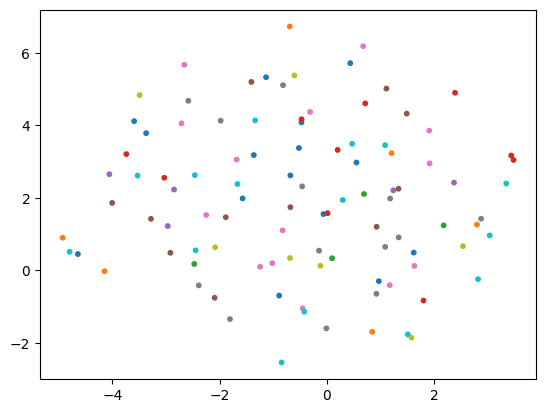

In [7]:
from sklearn.manifold import TSNE
import numpy as np

# Dummy data for demonstration
# X_valid_compressed = stacked_encoder.predict(X_valid)
X_valid_compressed = np.random.rand(100, 30)
y_valid = np.random.randint(0, 10, 100)

tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
# plt.show()

## Tying Weights

In [27]:
from tensorflow import keras
import tensorflow as tf

# Custom layer for tying weights
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        # The bias shape should match the input dimension of the original dense layer.
        # This is the last dimension of the dense layer's input shape.
        # We assume the dense layer's input shape is available by this point.
        self.biases = self.add_weight(name="bias", initializer="zeros",
                                      shape=[self.dense.input_shape[-1]]) # Get shape from dense.input_shape

        super().build(batch_input_shape)

    def call(self, inputs):
        # Access the kernel directly and transpose it for the matrix multiplication
        z = tf.matmul(inputs, self.dense.kernel, transpose_b=True)
        return self.activation(z + self.biases)

# Building the tied autoencoder
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"), # This layer should have biases with shape [100]
    DenseTranspose(dense_1, activation="sigmoid"), # This layer should have biases with shape [784] (after Flatten)
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

## Convolutional Autoencoders

In [12]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",
                                activation="selu",
                                input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",
                                activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",
                                activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Recurrent Autoencoders

In [14]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 28]),
    keras.layers.LSTM(30)
])

recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])

recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/repeat_vector.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Denoising Autoencoders

In [19]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Sparse Autoencoders

In [20]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)
])

sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Menggunakan KL Divergence

In [21]:
import tensorflow.keras.backend as K

kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))
    def get_config(self):
        return {"weight": self.weight, "target": self.target}

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)

sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])

sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Variational Autoencoders

In [28]:
import tensorflow as tf

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

codings_size = 10

# Encoder
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

# Decoder
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

# Variational Autoencoder
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

# Add latent loss and compile
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

# history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128,
#                              validation_data=[X_valid, X_valid])

## Generating Fashion MNIST Images

In [29]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_179']
Received: inputs=Tensor(shape=(12, 10))
  warnings.warn(msg)


In [30]:
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_179']
Received: inputs=Tensor(shape=(35, 10))
  warnings.warn(msg)


## Generative Adversarial Networks (GANs)

In [31]:
# Models
codings_size = 30
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

# Compile
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

# Dataset
batch_size = 32
# dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
# dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

# Training loop
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)

# train_gan(gan, dataset, batch_size, codings_size)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Deep Convolutional GANs (DCGANs)

In [32]:
codings_size = 100

# Generator
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                activation="tanh"),
])

# Discriminator
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

# Data Preprocessing
# X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
